### Every year many students give the GRE exam to get admission in foreign Universities. The dataset contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable.
### Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1) Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions.
### The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score.
### So, to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not.

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from matplotlib.pyplot import figure


In [3]:
data = pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data.shape

(400, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [8]:
data["Research"].unique()

array([1, 0], dtype=int64)

No handles with labels found to put in legend.


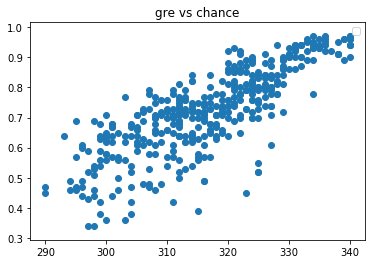

In [9]:
plt.title("gre vs chance")
plt.xlabel("")
plt.ylabel("")
#plt.ylim()
plt.scatter( data["GRE Score"], data["Chance of Admit "])
# plt.grid(True,color = 'gray', linestyle = '--', linewidth = 0.2)
plt.legend()
plt.show()

No handles with labels found to put in legend.


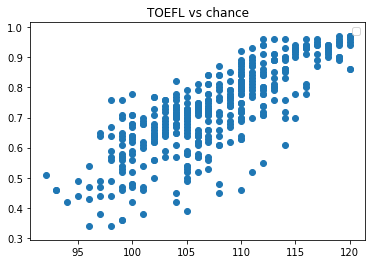

In [10]:
plt.title("TOEFL vs chance")
plt.xlabel("")
plt.ylabel("")
#plt.ylim()
plt.scatter( data["TOEFL Score"], data["Chance of Admit "])
# plt.grid(True,color = 'gray', linestyle = '--', linewidth = 0.2)
plt.legend()
plt.show()

In [11]:
chances = data["Chance of Admit "]

In [12]:
chances

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [13]:
chances[chances >= 0.8] = 1
chances[chances < 0.8] = 0
chances

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [14]:
data["encoded_chances"] = chances

In [15]:
data["encoded_chances"]

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: encoded_chances, Length: 400, dtype: float64

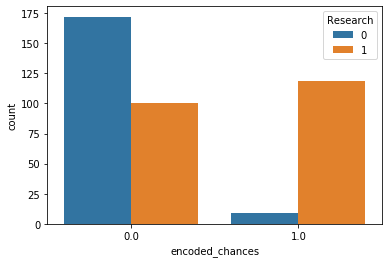

In [16]:
sns.countplot(x = data["encoded_chances"], hue= data["Research"])

In [17]:
model = DecisionTreeClassifier(random_state=0)

In [18]:
y = data["encoded_chances"]
x = data[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [20]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
y_pred = model.predict(x_test)

In [22]:
print(x_test.shape, y_test.shape, y_pred.shape)

(80, 7) (80,) (80,)


In [23]:
y_test.shape

(80,)

In [24]:
confusion_matrix(y_test, y_pred)

array([[48,  7],
       [ 6, 19]], dtype=int64)

# accuracy

In [25]:
accuracy_score(y_test, y_pred)

0.8375

# recall score

In [26]:
recall_score(y_test, y_pred)

0.76

[Text(1016.3571428571428, 1556.6727272727271, 'X[5] <= 8.93\ngini = 0.437\nsamples = 320\nvalue = [217, 103]'),
 Text(438.4285714285714, 1408.418181818182, 'X[0] <= 319.5\ngini = 0.112\nsamples = 219\nvalue = [206, 13]'),
 Text(159.42857142857142, 1260.1636363636362, 'X[5] <= 8.675\ngini = 0.022\nsamples = 177\nvalue = [175, 2]'),
 Text(79.71428571428571, 1111.909090909091, 'gini = 0.0\nsamples = 159\nvalue = [159, 0]'),
 Text(239.1428571428571, 1111.909090909091, 'X[6] <= 0.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(159.42857142857142, 963.6545454545454, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(318.85714285714283, 963.6545454545454, 'X[5] <= 8.695\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(239.1428571428571, 815.4, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(398.57142857142856, 815.4, 'X[2] <= 3.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(318.85714285714283, 667.1454545454545, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(478.2857142

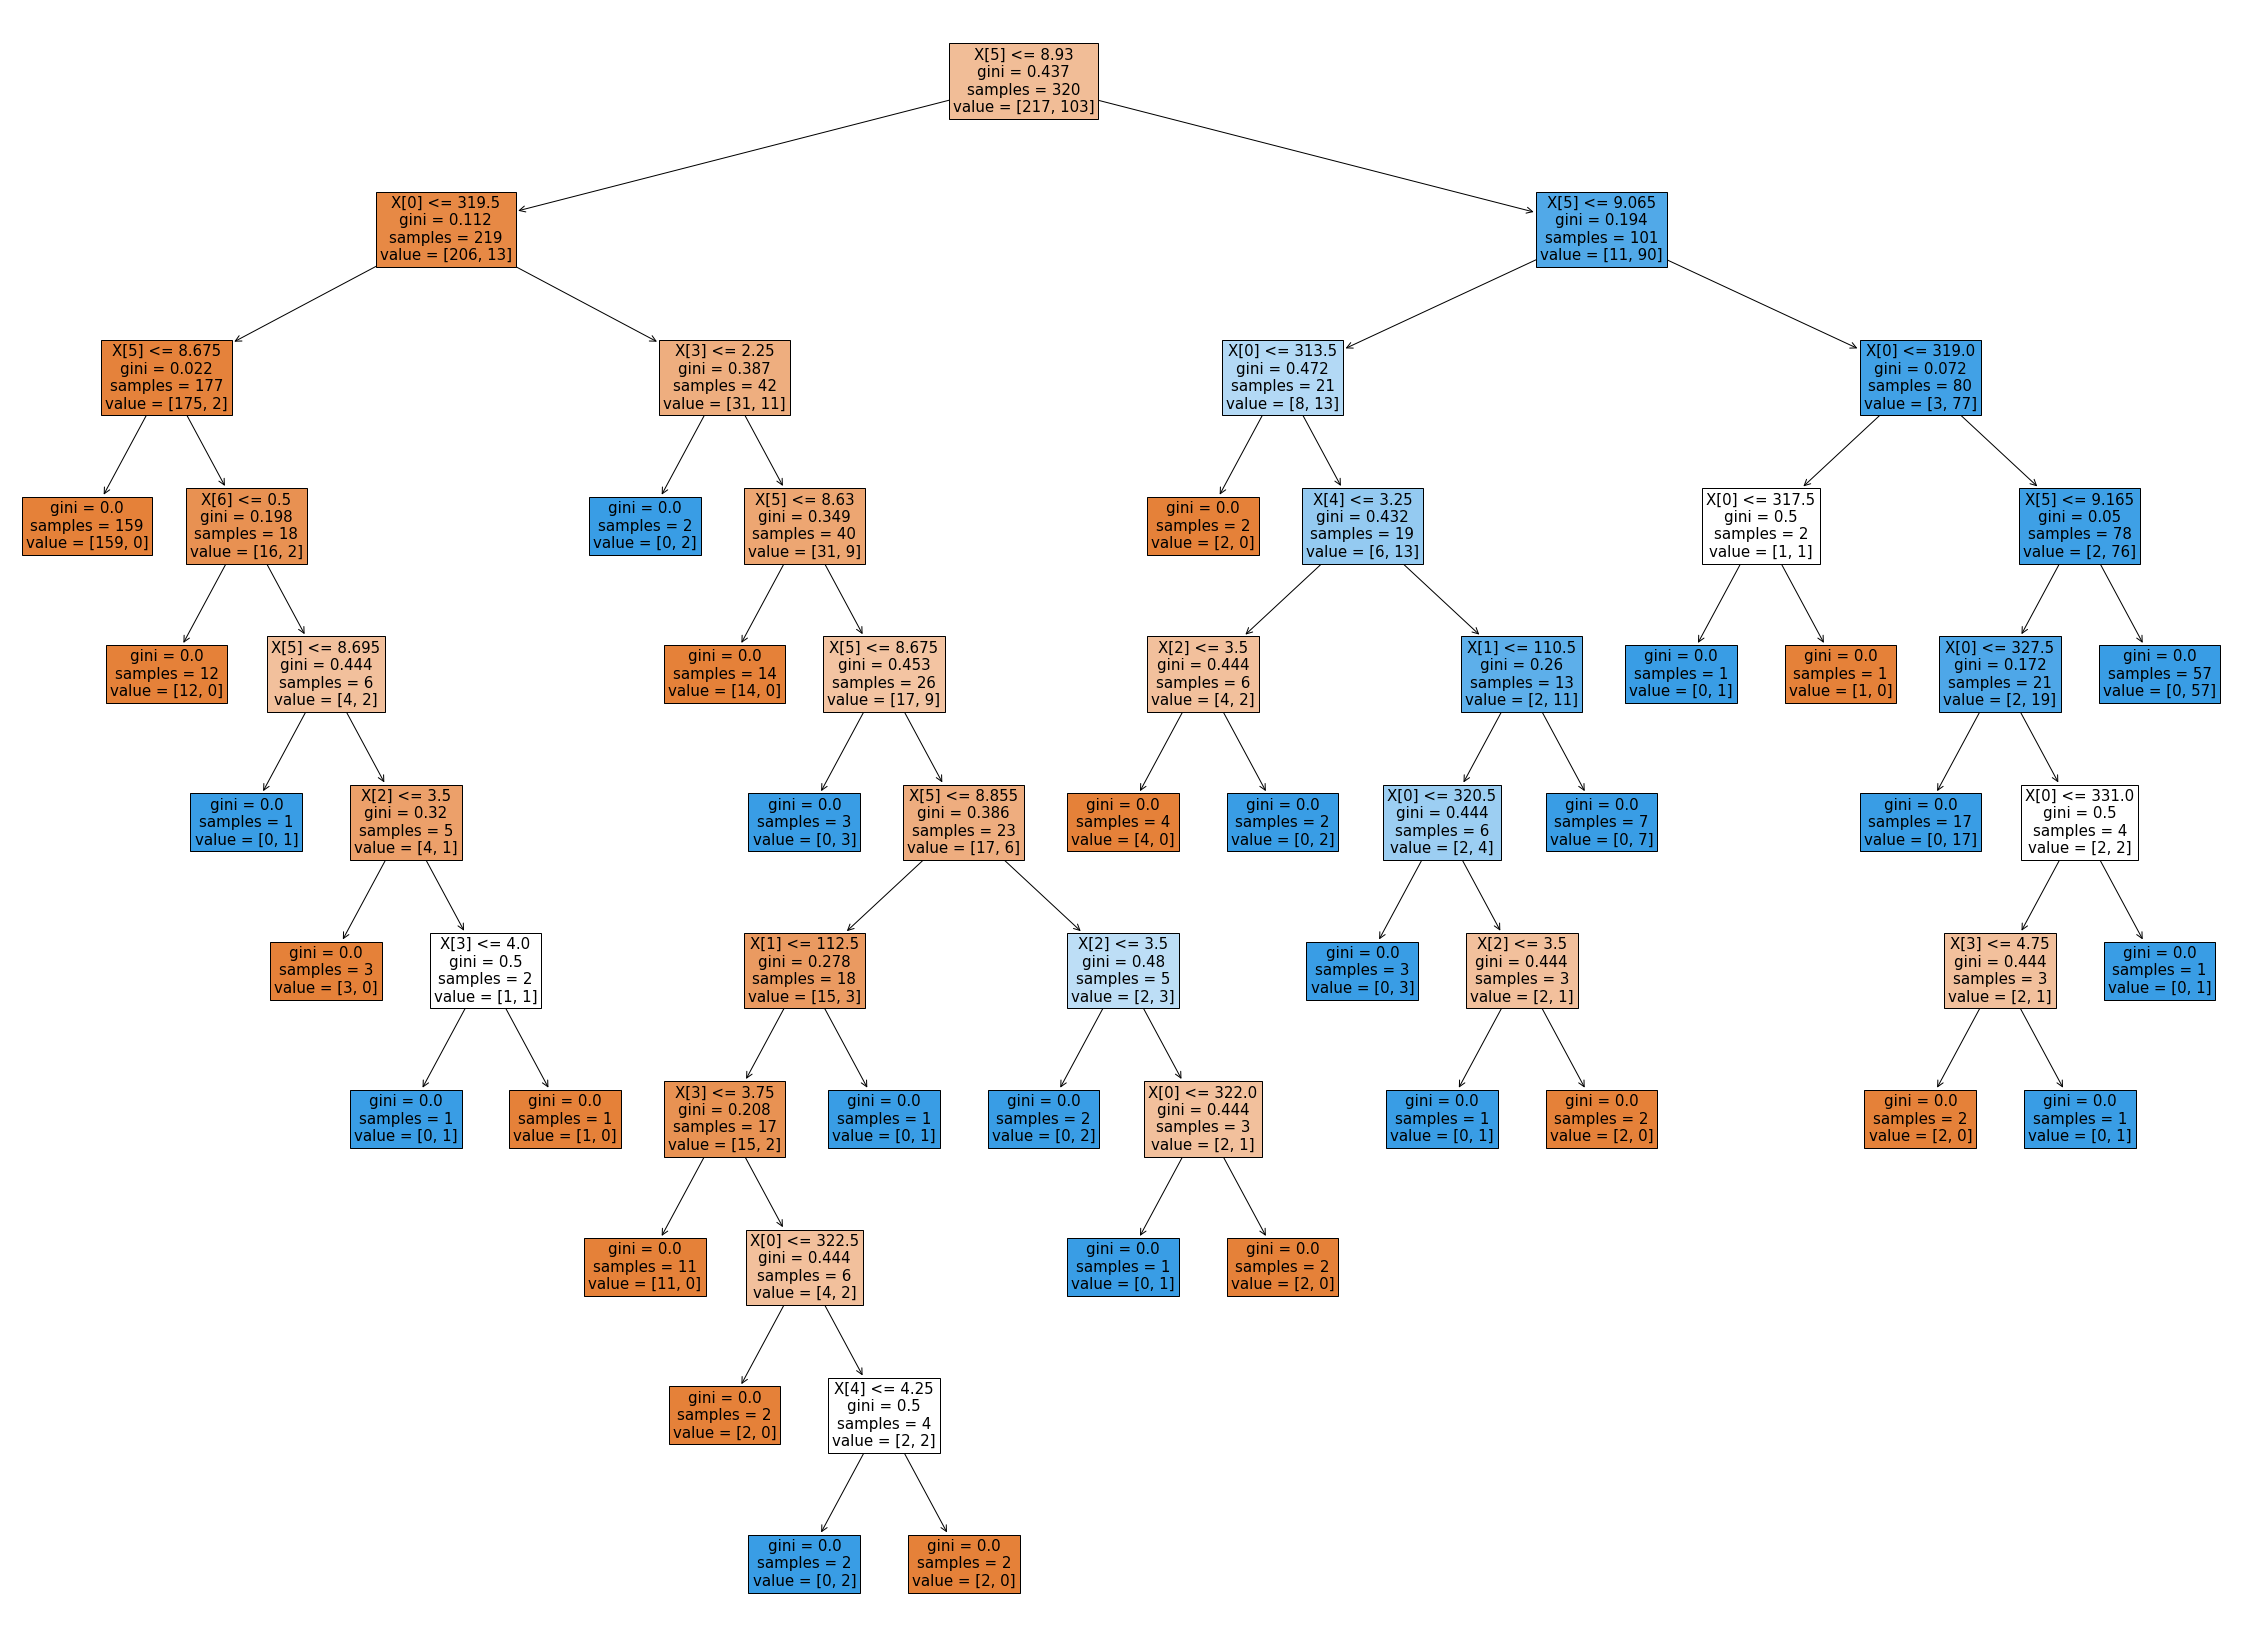

In [28]:
plt.figure(figsize=(40, 30))
plot_tree(model, filled=True, fontsize=15)